# Лабораторная работа №6

|Выполнил студент группы|ФИО|Вариант|
|--|--|--|
|М8О-406Б-19|Илья Ильин Олегович|1|

### Задание

Используя явную схему крест и неявную схему, решить начально-краевую задачу для
дифференциального уравнения гиперболического типа. Аппроксимацию второго
начального условия произвести с первым и со вторым порядком. Осуществить
реализацию трех вариантов аппроксимации граничных условий, содержащих
производные: двухточечная аппроксимация с первым порядком, трехточечная
аппроксимация со вторым порядком, двухточечная аппроксимация со вторым
порядком. 

В различные моменты времени вычислить
погрешность численного решения путем сравнения результатов с приведенным в
задании аналитическим решением
$U(x,t)$
. Исследовать зависимость погрешности от
сеточных параметров
$ \tau, h$ .

### Вариант

$\frac{\partial^2 u}{\partial t^2} = a^2 \frac{\partial u^2}{\partial x^2}, a^2>0$

$u_x(0, t) - u(0, t) = 0$

$u_x(\pi, t) - u(\pi, t) = 0$

$u(x, 0) = sin(x) + cos(x)$

$u_t = (x,0) = -a(sin x + cos x)$

Аналитическое решение: 
$U(x,t) = sin(x - at) + cos(x + at)$

In [1]:
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
class Approx:
    def __init__(self):
        pass

    def explicit_0(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        pass

    def explicit_l(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        pass

    def implicit_0(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        pass

    def implicit_l(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        pass


class Approx2p1a(Approx):
    def explicit_0(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return u[k+1, 1] / (1.0 + h)

    def explicit_l(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return u[k+1, -2] / (1.0 - h)

    def implicit_0(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return (1.0 + h), -1.0, 0.0

    def implicit_l(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return -1.0, (1.0 - h), 0.0


class Approx3p2a(Approx):
    def explicit_0(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return (4.0 * u[k+1][1] - u[k+1][2]) / (3.0 + 2.0 * h)

    def explicit_l(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return (4.0 * u[k+1][-2] - u[k+1][-3]) / (3.0 - 2.0 * h)

    def implicit_0(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return (-(2.0 + 2.0 * h),
                -(1.0 / sigma - 2.0),
                (-2.0 * u[k][1] + u[k-1][1]) / sigma)

    def implicit_l(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return (-(1.0 / sigma - 2.0),
                -(2.0 - 2.0 * h),
                (-2.0 * u[k][-2] + u[k-1][-2]) / sigma)


class Approx2p2a(Approx):
    def explicit_0(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return sigma * (2.0 * u[k][1] - (2.0 + 2.0 * h) * u[k][0]) + \
               2.0 * u[k][0] - u[k-1][0]

    def explicit_l(self, h: float, sigma: float,
                   u: np.ndarray,
                   k: float, tau: float):
        return sigma * (2.0 * u[k][-2] + (2.0 * h - 2.0) * u[k][-1]) + \
               2.0 * u[k][-1] - u[k-1][-1]

    def implicit_0(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return (-(2.0 + 2.0 * h + 1.0 / sigma),
                2.0,
                (-2.0 * u[k][0] + u[k-1][0]) / sigma)

    def implicit_l(self, h: float, sigma: float,
                   u: np.ndarray, k: np.ndarray):
        return (2.0,
                -(2.0 - 2.0 * h + 1.0 / sigma),
                (-2.0 * u[k][-1] + u[k-1][-1]) / sigma)

In [3]:
def sweep_solve(matrix: np.ndarray, target: np.ndarray) -> np.ndarray:
    p_coeffs: np.ndarray = np.zeros(shape=matrix.shape[1])
    q_coeffs: np.ndarray = np.zeros(shape=matrix.shape[1])

    for i in range(matrix.shape[1]):
        if i == matrix.shape[1] - 1:
            p_coeffs[i] = 0
        elif i == 0:
            p_coeffs[i] = -matrix[i, i + 1] / matrix[i, i]
        else:
            p_coeffs[i] = -matrix[i, i + 1] / (matrix[i, i] + matrix[i, i - 1] * p_coeffs[i - 1])

        if i == 0:
            q_coeffs[i] = target[i] / matrix[i, i]
        else:
            q_coeffs[i] = ((target[i] - matrix[i, i - 1] * q_coeffs[i - 1]) /
                           (matrix[i, i] + matrix[i, i - 1] * p_coeffs[i - 1]))

    answer: np.ndarray = np.zeros(shape=matrix.shape[1] + 1)

    for i in range(matrix.shape[1] - 1, -1, -1):
        answer[i] = p_coeffs[i] * answer[i + 1] + q_coeffs[i]

    return answer[:-1]

In [4]:
def second_derivative(values: np.ndarray, step: float):
    derivatives = np.zeros(shape=values.shape)
    for i in range(1, len(values) - 1):
        derivatives[i] = (values[i - 1] - 2.0 * values[i] + values[i + 1]) / step**2
    return derivatives

In [5]:
def explicit_method(u_initial: Callable, u_t_initial: Callable, u_x2_initial: Callable,
                    a: float, h: float, tau: float,
                    l: float, r: float, t_bound: float,
                    approx: Approx) -> np.ndarray:
    sigma: float = a * tau**2 / h**2
    if sigma > 1.0:
        print("WARNING : explicit method is not stable")

    x: np.ndarray = np.arange(l, r + h / 2.0, step=h)
    t: np.ndarray = np.arange(0, t_bound + tau / 2.0, step=tau)
    u: np.ndarray = np.zeros(shape=(len(t), len(x)))

    u[0] = u_initial(x)
    u[1] = u[0] + tau * u_t_initial(a, x) + tau**2 * u_x2_initial(x) / 2.0

    for k in range(1, len(t) - 1):
        u[k+1] = 2.0 * u[k] - u[k-1] + tau**2 * a * second_derivative(u[k], step=h)
        u[k+1, 0] = approx.explicit_0(h, sigma, u, k, tau)
        u[k+1, -1] = approx.explicit_l(h, sigma, u, k, tau)

    return u


def implicit_method(u_initial: Callable, u_t_initial: Callable, u_x2_initial: Callable,
                    a: float, h: float, tau: float,
                    l: float, r: float, t_bound: float,
                    approx: Approx) -> np.ndarray:
    sigma: float = a * tau ** 2 / h ** 2
    x: np.ndarray = np.arange(l, r + h/2.0, step=h)
    t: np.ndarray = np.arange(0, t_bound + tau/2.0, step=tau)
    u: np.ndarray = np.zeros(shape=(len(t), len(x)))

    u[0] = u_initial(x)
    u[1] = u[0] + tau * u_t_initial(a, x) + tau**2 * u_x2_initial(x) / 2.0

    for k in range(1, len(t) - 1):
        start = approx.implicit_0(h, sigma, u, k)
        end = approx.implicit_l(h, sigma, u, k)
        matrix: np.ndarray = np.zeros(shape=(len(x), len(x)))
        matrix[0] += np.array(
            [start[0], start[1]] + [0.0] * (len(matrix) - 2)
        )
        target: List[float] = [start[2]]

        for i in range(1, len(matrix) - 1):
            matrix[i] += np.array(
                [0.0] * (i - 1)
                + [
                    1.0,
                    -(2.0 + 1.0 / sigma),
                    1.0
                ]
                + [0.0] * (len(matrix) - i - 2)
            )
            target += [(-2.0 * u[k][i] + u[k-1][i]) / sigma]

        matrix[-1] += np.array(
            [0.0] * (len(matrix) - 2) + [end[0], end[1]]
        )
        target += [end[2]]

        u[k+1] = sweep_solve(matrix, np.array(target)).tolist()

    return u

In [10]:
def analytical_solution(a: float, x: float, t: float) -> float:
    return np.sin(x - a * t) + np.cos(x + a * t)


def analytical_grid(a: float, x: np.ndarray, t: np.ndarray) -> np.ndarray:
    grid: np.ndarray = np.zeros(shape=(len(t), len(x)))
    for i in range(len(t)):
        for j in range(len(x)):
            grid[i, j] = analytical_solution(a, x[j], t[i])
    return grid


def u_initial(x: np.ndarray) -> np.ndarray:
    return np.sin(x) + np.cos(x)


def u_t_initial(a: float, x: np.ndarray) -> np.ndarray:
    return -a * (np.sin(x) + np.cos(x))


def u_x2_initial(x: np.ndarray) -> np.ndarray:
    return -u_initial(x)


def error(numeric: np.ndarray, analytical: np.ndarray) -> np.ndarray:
    return np.max(np.abs(numeric - analytical), axis=0)


def draw(numerical: np.ndarray, analytical: np.ndarray,
         x: np.ndarray, t: np.ndarray,
         title_lhs: str, title_rhs: str):
    fig = plt.figure(figsize=plt.figaspect(0.7))
    xx, tt = np.meshgrid(x, t)

    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title(title_lhs)
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    ax.plot_surface(xx, tt, numerical, cmap=cm.coolwarm, linewidth=0, antialiased=True)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title(title_rhs)
    ax.plot_surface(xx, tt, analytical, cmap=cm.coolwarm, linewidth=0, antialiased=True)

    plt.show()

    plt.title('Slices')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.scatter(xx[0], analytical[0], c='blue')
    plt.plot(xx[0], numerical[0], c='blue')
    plt.scatter(xx[150], analytical[150], c='orange')
    plt.plot(xx[150], numerical[150], c='orange')
    plt.scatter(xx[314], analytical[314], c='red')
    plt.plot(xx[314], numerical[314], c='red')
    plt.show()

    

def drawerror(error):
 
    plt.plot(np.arange(0, error.shape[0]), error)
    plt.title('Error')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.show()


In [7]:
def runner(a, h, tau, t_bound):
    x: np.ndarray = np.arange(0, np.pi + h/2.0, step=h)
    t: np.ndarray = np.arange(0, t_bound + tau/2.0, step=tau)

    kwargs = {
        "u_initial": u_initial,
        "u_t_initial": u_t_initial,
        "u_x2_initial": u_x2_initial,
        "a": a,
        "h": h,
        "tau": tau,
        "l": 0.0,
        "r": np.pi,
        "t_bound": t_bound
    }

    analytical = analytical_grid(a, x, t)

    print("---------------- EXPLICIT  ----------------")
    approx = Approx2p2a()
    sol = explicit_method(**kwargs, approx=approx)
    # print(np.round(sol, 3))
    # print("\nError: ", error(sol, analytical))
    # print("-------------------------------------------------\n")
    # print("--------------- ANALYTICAL ---------------")
    # print(np.round(analytical, 3))

    draw(sol, analytical, x, t, 'explicit', 'analytic')
    drawerror(error=error(sol, analytical))

    print("\n\n---------------- IMPLICIT  ----------------")
    approx = Approx2p2a()
    sol = implicit_method(**kwargs, approx=approx)
    # print(np.round(sol, 3))
    # print("\nError: ", error(sol[-1], analytical[-1]))
    # print("-------------------------------------------------\n")
    # print("--------------- ANALYTICAL ---------------")
    # print(np.round(analytical, 3))

    draw(sol, analytical, x, t, 'implicit', 'analytic')
    drawerror(error=error(sol, analytical))

    print(error(sol, analytical).shape)
    print(np.max(np.abs(sol - analytical), axis=1).shape)


---------------- EXPLICIT  ----------------


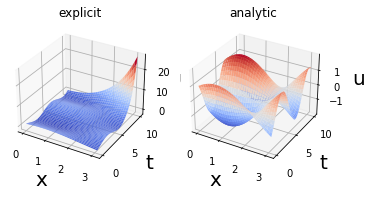

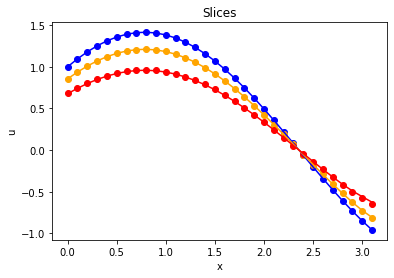

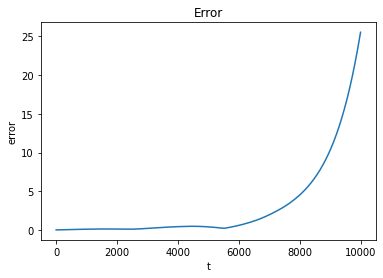



---------------- IMPLICIT  ----------------


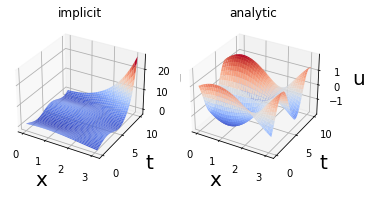

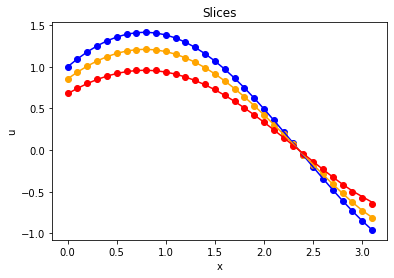

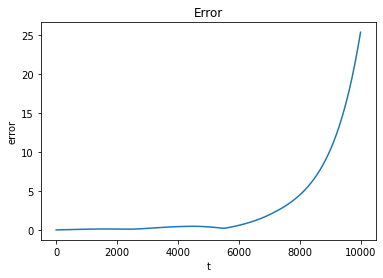

(10001,)
(10001,)


In [9]:
testcase_1 = {'a': 0.9,
                'h' : 0.1,
                'tau' : 0.001,
                't_bound' : 10}
runner(**testcase_1)